In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path().cwd().parent)
print(Path().cwd())

c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\CLI-Demos
c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS


# Wavelet

2025-05-22 14:37:48,194 - INFO - Building time array...
2025-05-22 14:37:48,195 - INFO - Time array created with length: 90
2025-05-22 14:37:48,197 - INFO - Starting central frequency calculation.
2025-05-22 14:37:48,200 - INFO - Frequency with maximum amplitude: 3.00 MHz
2025-05-22 14:37:48,200 - INFO - Frequency with Maximum Amplitude: 3.00 MHz
2025-05-22 14:37:48,202 - INFO - Starting the plot process.
2025-05-22 14:37:48,202 - INFO - Visualization is enabled.
2025-05-22 14:37:48,214 - INFO - Figure created with size 12x4.
2025-05-22 14:37:48,225 - INFO - Time shifted to positive values.
2025-05-22 14:37:48,230 - INFO - Hermite wavelet plot created with time scaled to microseconds.
2025-05-22 14:37:48,231 - INFO - Starting FFT calculation.
2025-05-22 14:37:48,232 - INFO - FFT calculation completed.
2025-05-22 14:37:48,234 - INFO - Frequency response plot created.


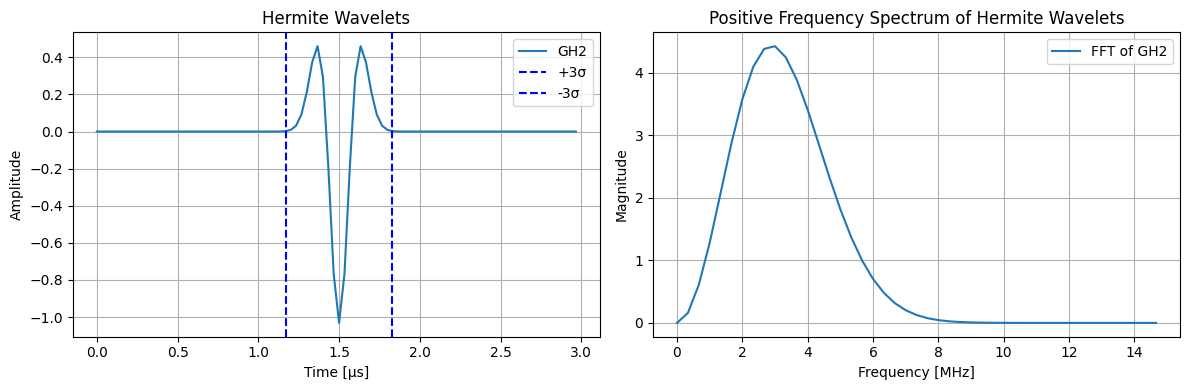

2025-05-22 14:37:48,464 - INFO - Plots displayed successfully.
2025-05-22 14:37:48,464 - INFO - Building time array...
2025-05-22 14:37:48,466 - INFO - Time array created with length: 90
2025-05-22 14:37:48,467 - INFO - Starting central frequency calculation.
2025-05-22 14:37:48,470 - INFO - Frequency with maximum amplitude: 5.67 MHz
2025-05-22 14:37:48,470 - INFO - Frequency with Maximum Amplitude: 5.67 MHz
2025-05-22 14:37:48,470 - INFO - Starting the plot process.
2025-05-22 14:37:48,472 - INFO - Visualization is enabled.
2025-05-22 14:37:48,472 - INFO - Figure created with size 12x4.
2025-05-22 14:37:48,477 - INFO - Time shifted to positive values.
2025-05-22 14:37:48,483 - INFO - Hermite wavelet plot created with time scaled to microseconds.
2025-05-22 14:37:48,484 - INFO - Starting FFT calculation.
2025-05-22 14:37:48,484 - INFO - FFT calculation completed.
2025-05-22 14:37:48,496 - INFO - Frequency response plot created.


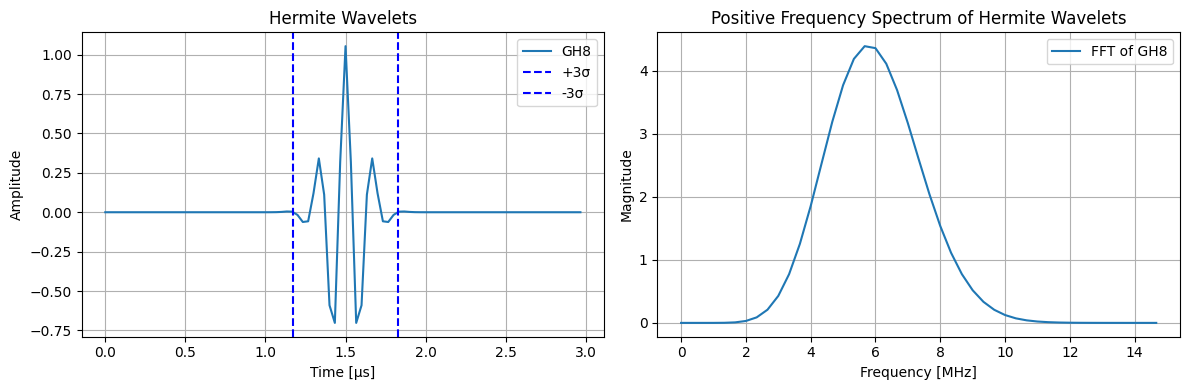

2025-05-22 14:37:48,781 - INFO - Plots displayed successfully.


In [2]:
from pyquantus.utc.analysis import Hscan

wavelet_params_1 = {
    'order': 2, 
    'fs': 30e6, 
    'sigma': 0.11e-6, 
    'wavelet_duration': 3e-6,
    'visualize': True
}

wavelet_params_2 = {
    'order': 8, 
    'fs': 30e6, 
    'sigma': 0.11e-6, 
    'wavelet_duration': 3e-6,
    'visualize': True
}

Hscan.GaussinaHermiteWavelet(**wavelet_params_1)
Hscan.GaussinaHermiteWavelet(**wavelet_params_2)

# Read sample data

2025-05-22 14:37:50,134 - INFO - Version 12.0.1-673 is valid.
2025-05-22 14:37:50,143 - INFO - Reading raw RF file: d:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw
2025-05-22 14:37:50,144 - INFO - Opened file successfully.
2025-05-22 14:37:50,145 - INFO - Parsed header: {'id': 2, 'frames': 34, 'lines': 192, 'samples': 2928, 'samplesize': 2}
2025-05-22 14:37:50,355 - INFO - Successfully read 34 RF frames.
2025-05-22 14:37:50,356 - INFO - Loaded 34 raw RF frames of size 192 x 2928 (lines x samples)
2025-05-22 14:37:50,357 - INFO - Final data stored for 61804357200: [{'depth': 7.5, 'dB': 5.0}, {'depth': 22.5, 'dB': 13.04}, {'depth': 37.5, 'dB': 24.62}, {'depth': 52.5, 'dB': 27.55}, {'depth': 67.5, 'dB': 31.17}, {'depth': 82.5, 'dB': 35.23}, {'depth': 97.5, 'dB': 35.62}, {'depth': 112.5, 'dB': 35.98}, {'depth': 127.5, 'dB': 36.74}, {'depth': 142.5, 'dB': 39.07}]
2025-05-22 14:37:50,357 - INFO - Final data stored for 61895766460: [{'dept

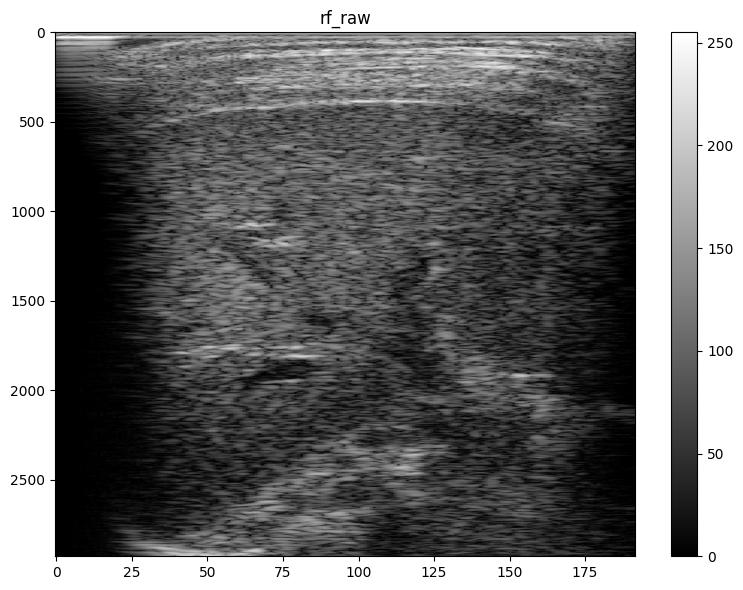

2025-05-22 14:38:58,684 - INFO - Plotting completed and displayed.
2025-05-22 14:38:58,684 - INFO - Starting the plot function.
2025-05-22 14:38:58,999 - INFO - Displayed 2D Signal Envelope.


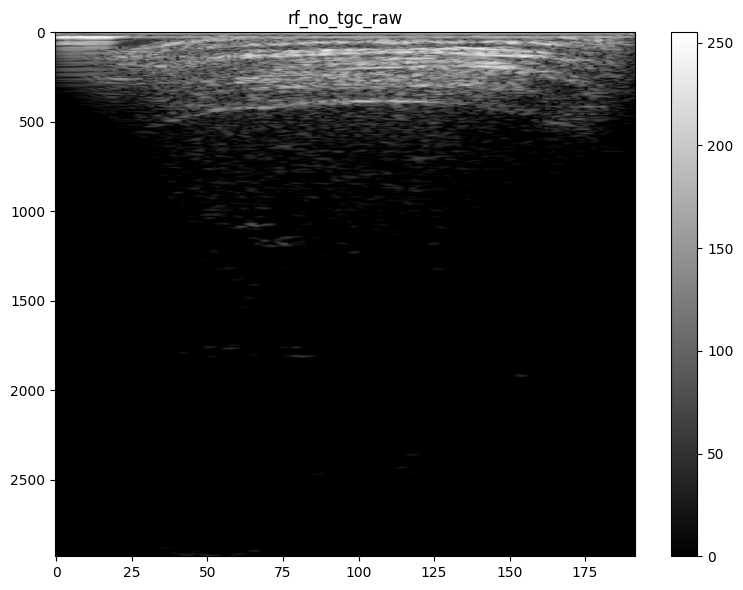

2025-05-22 14:38:59,310 - INFO - Plotting completed and displayed.


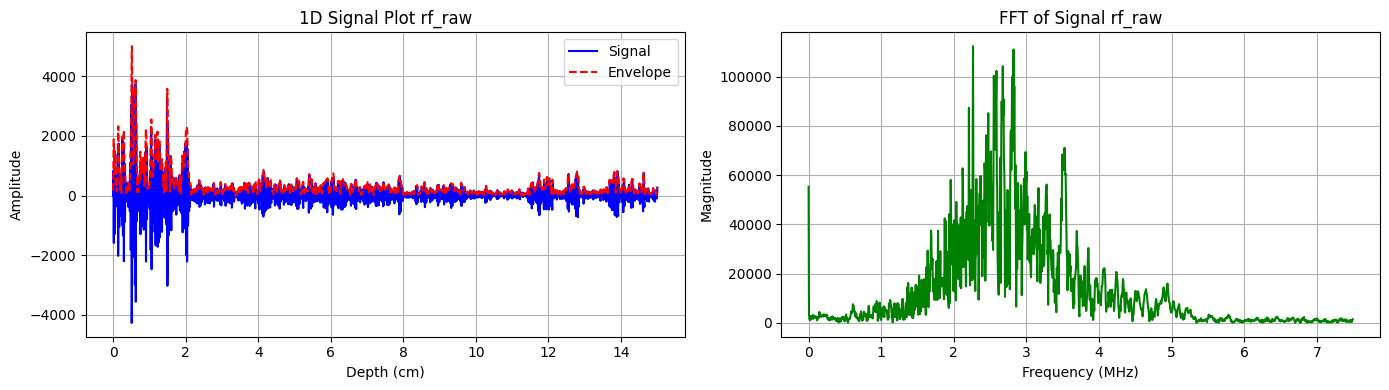

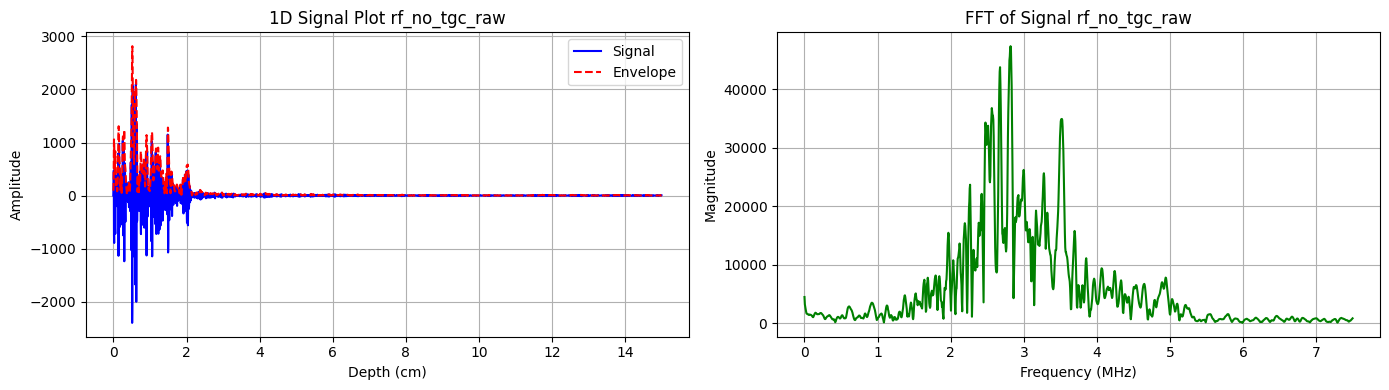

In [3]:
from pyquantus.parse.clarius import ClariusParser

rf_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw'
rf_tgc_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
info_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_rf.yml'

data_obj = ClariusParser(rf_path, rf_tgc_path, info_path, visualize=True) # image = phantom for now

In [12]:
signal_nd = data_obj.clarius_data_struct.rf
print(signal_nd.shape)

import numpy as np
# Save signal_nd as a numpy array file
np.save('signal_nd.npy', signal_nd)



(34, 2928, 192)


In [1]:
import numpy as np

# Load the signal_nd from the saved numpy array file
signal_nd = np.load('signal_nd.npy')


# Hscan

In [2]:
from pyquantus.utc.analysis import Hscan

hscan_params = {
    'signal_nd': signal_nd,
    'signal_axis': 1,
    'wavelet_GH1_params': {
        'order': 2, 
        'fs': 30e6, 
        'sigma': 0.11e-6, 
        'wavelet_duration': 3e-6,
        'visualize': False
    },
    'wavelet_GH2_params': {
        'order': 8, 
        'fs': 30e6, 
        'sigma': 0.11e-6, 
        'wavelet_duration': 3e-6,
        'visualize': False
    }
}

hscan_obj = Hscan(**hscan_params)


2025-05-22 14:57:19,665 - INFO - Building time array...
2025-05-22 14:57:19,665 - INFO - Time array created with length: 90
2025-05-22 14:57:19,665 - INFO - Starting central frequency calculation.
2025-05-22 14:57:19,677 - INFO - Frequency with maximum amplitude: 3.00 MHz
2025-05-22 14:57:19,677 - INFO - Frequency with Maximum Amplitude: 3.00 MHz
2025-05-22 14:57:19,677 - INFO - Starting the plot process.
2025-05-22 14:57:19,677 - INFO - Visualization is disabled; no plots will be shown.
2025-05-22 14:57:19,677 - INFO - Building time array...
2025-05-22 14:57:19,677 - INFO - Time array created with length: 90
2025-05-22 14:57:19,680 - INFO - Starting central frequency calculation.
2025-05-22 14:57:19,680 - INFO - Frequency with maximum amplitude: 5.67 MHz
2025-05-22 14:57:19,680 - INFO - Frequency with Maximum Amplitude: 5.67 MHz
2025-05-22 14:57:19,680 - INFO - Starting the plot process.
2025-05-22 14:57:19,680 - INFO - Visualization is disabled; no plots will be shown.
2025-05-22 14:

In [3]:
print(hscan_obj.convolved_signal_with_ghx_1_nd.shape)
print(hscan_obj.convolved_signal_with_ghx_2_nd.shape)
print(hscan_obj.convolved_signal_with_ghx_1_envelope_nd.shape)
print(hscan_obj.convolved_signal_with_ghx_2_envelope_nd.shape)


(34, 2928, 192)
(34, 2928, 192)
(34, 2928, 192)
(34, 2928, 192)
